# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** Muhammad Nashih Ulwan
- **Email:** m008d4ky3145@bangkit.academy
- **ID Dicoding:** nashih-ulwan

## Menentukan Pertanyaan Bisnis

- How is the average substances level change year by year?
- How is the average of each substances level in each stations?

## Import Semua Packages/Library yang Digunakan

In [21]:
#Import module
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from streamlit_option_menu import option_menu
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio

pio.templates.default = "plotly_dark"
sns.set_style("darkgrid")

## Data Wrangling

### Gathering Data

In [22]:
#membaca data
df_aotizhongxin = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
df_changping = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv")
df_dingling = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv")
df_dongsi = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv")
df_guanyuan = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv")
df_gucheng = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv")
df_huairou = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv")
df_nongzhanguan = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
df_shunyi = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
df_tiantan = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv")
df_wanliu = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv")
df_wanshouxigong = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv")

### Assessing Data

In [ ]:
#Menggabungkan data menjadi satu dataframe
df = pd.concat([df_aotizhongxin,df_changping, df_dingling, df_dongsi, df_guanyuan, df_gucheng, df_huairou, df_nongzhanguan, df_shunyi, df_tiantan, df_wanliu, df_wanshouxigong])

In [ ]:
#informasi dari setiap variabel
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412017 non-null  float64
 6   PM10     414149 non-null  float64
 7   SO2      412108 non-null  float64
 8   NO2      408994 non-null  float64
 9   CO       400469 non-null  float64
 10  O3       407261 non-null  float64
 11  TEMP     420401 non-null  float64
 12  PRES     420406 non-null  float64
 13  DEWP     420399 non-null  float64
 14  RAIN     420409 non-null  float64
 15  wd       419348 non-null  object 
 16  WSPM     420480 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


In [ ]:
#Menampilkan jumlah baris dan kolom
print("Jumlah baris: {}".format(df.shape[0]))
print("Jumlah kolom: {}".format(df.shape[1]))

Jumlah baris: 420768
Jumlah kolom: 18


In [ ]:
#jumlah data yang terduplikat
print("Data yang terduplikat : {}".format(df.duplicated().sum()))

Data yang terduplikat : 35064


In [ ]:
#jumlah data na
print("Jumlah data na:\n{}".format(df.isna().sum()))

Jumlah data na:
No             0
year           0
month          0
day            0
hour           0
PM2.5       8751
PM10        6619
SO2         8660
NO2        11774
CO         20299
O3         13507
TEMP         367
PRES         362
DEWP         369
RAIN         359
wd          1420
WSPM         288
station        0
dtype: int64


<Axes: >

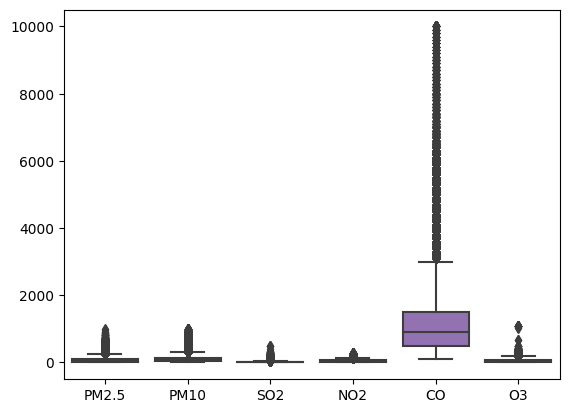

In [ ]:
#menampilkan boxplot dari data yang memiliki missing value
sns.boxplot(df[["PM2.5","PM10", "SO2", "NO2", "CO", "O3"]])

<Axes: >

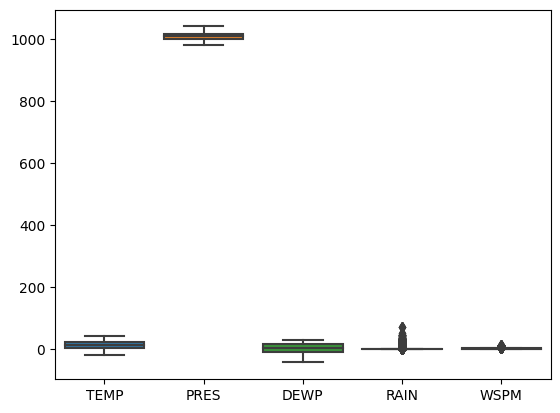

In [ ]:
sns.boxplot(df[["TEMP", "PRES", "DEWP", "RAIN", "wd", "WSPM"]])

### Cleaning Data

In [ ]:
#Imputing misssing value
df["PM2.5"].fillna(df["PM2.5"].median(), inplace=True)
df["PM10"].fillna(df["PM10"].median(), inplace=True)
df["SO2"].fillna(df["SO2"].median(), inplace=True)
df["NO2"].fillna(df["NO2"].median(), inplace=True)
df["O3"].fillna(df["O3"].median(), inplace=True)
df["CO"].fillna(df["CO"].median(), inplace=True)
df["TEMP"].fillna(df["TEMP"].mean(), inplace=True)
df["PRES"].fillna(df["PRES"].mean(), inplace=True)
df["DEWP"].fillna(df["DEWP"].mean(), inplace=True)
df["RAIN"].fillna(df["RAIN"].median(), inplace=True)
df["WSPM"].fillna(df["WSPM"].median(), inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
#Descriptive statistcs
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
No,420768.0,17532.500000,10122.116943,1.0000,8766.75,17532.5,26298.25,35064.0
year,420768.0,2014.662560,1.177198,2013.0000,2014.00,2015.0,2016.00,2017.0
month,420768.0,6.522930,3.448707,1.0000,4.00,7.0,10.00,12.0
day,420768.0,15.729637,8.800102,1.0000,8.00,16.0,23.00,31.0
hour,420768.0,11.500000,6.922195,0.0000,5.75,11.5,17.25,23.0
PM2.5,420768.0,79.544077,80.136246,2.0000,21.00,55.0,110.00,999.0
PM10,420768.0,105.189453,91.585889,2.0000,37.00,83.0,145.00,999.0
SO2,420768.0,15.976263,21.707867,0.2856,3.00,8.0,19.00,500.0
NO2,420768.0,51.720982,35.144090,1.0265,24.00,45.0,72.00,290.0
CO,420768.0,1220.770769,1139.486320,100.0000,500.00,900.0,1500.00,10000.0


In [ ]:
grouped_df = df[["PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","WSPM", 'station']].groupby("station").mean()
grouped_df = grouped_df.reset_index()
grouped_df

,station,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,Aotizhongxin,82.040934,109.506280,17.125888,58.888457,1244.561887,55.796764,13.584591,1011.846235,3.122733,0.067383,1.708373
1,Changping,70.744359,94.464371,14.834271,44.197644,1141.357061,57.717103,13.685914,1007.764393,1.507068,0.060278,1.853280
2,Dingling,65.745349,83.725884,11.671585,28.198333,904.615132,67.733070,13.685914,1007.764393,1.507068,0.060278,1.853280
3,Dongsi,85.527068,109.905610,18.331981,53.302232,1290.857090,56.979406,13.671423,1012.546335,2.447591,0.063983,1.860601
4,Guanyuan,82.442642,108.704914,17.461290,57.659166,1252.731776,55.433916,13.584591,1011.846235,3.122733,0.067383,1.708373
5,Gucheng,83.320534,118.472308,15.259652,55.663971,1307.034309,57.430945,13.864075,1008.832182,2.610348,0.064374,1.343378
6,Huairou,69.228839,91.294718,12.006360,33.081667,1017.584417,59.338082,12.447040,1007.603174,2.239083,0.067833,1.651668
7,Nongzhanguan,84.304073,108.664947,18.553279,57.838695,1309.754991,58.339367,13.671423,1012.546335,2.447591,0.063983,1.860601
8,Tiantan,81.640423,105.965882,14.164587,52.989448,1285.512720,55.720215,13.671423,1012.546335,2.447591,0.063983,1.860601
9,Wanliu,83.065591,110.242169,18.206321,64.640580,1297.682609,48.640848,13.428937,1011.097278,3.266177,0.068224,1.501175


In [ ]:
year_grouped_df = df[["PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","WSPM", "year"]].groupby("year").mean().reset_index()
year_grouped_df

,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,2013,80.186189,104.183222,20.506265,54.157435,1155.464495,56.194315,15.686637,1007.543621,5.549796,0.066660,1.575970
1,2014,85.143308,116.158072,20.697692,55.725504,1246.362253,57.035498,13.919080,1010.542342,2.885717,0.050269,1.615908
2,2015,79.174020,104.360116,13.262269,49.583256,1270.250190,59.937086,13.449621,1011.039480,2.628709,0.075696,1.781856
3,2016,71.781222,95.022162,9.867619,46.806305,1143.469186,57.649249,13.614760,1011.165096,2.171081,0.077444,1.843043
4,2017,92.019833,110.753825,17.957097,58.023305,1574.588041,40.435205,0.537055,1021.720006,-13.328668,0.002854,1.995727


## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [ ]:
df_1 = df[df["station"]=="Aotizhongxin"].groupby("year").mean().reset_index()
df1_long1=pd.melt(df_1, id_vars=['year'], value_vars=["PM2.5","PM10","SO2","NO2","O3"])
fig = px.line(df1_long1, x="year", y="value", color="variable")
fig

C:\Users\DELL\AppData\Local\Temp\ipykernel_15916\2024462157.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_1 = df[df["station"]=="Aotizhongxin"].groupby("year").mean().reset_index()


In [ ]:
df1_long2=pd.melt(df_1, id_vars=['year'], value_vars=["CO", "PRES"])
fig = px.line(df1_long2, x="year", y="value", color="variable")
fig

In [ ]:
df1_long3=pd.melt(df_1, id_vars=['year'], value_vars=["TEMP", "RAIN", "WSPM"])
fig = px.line(df1_long3, x="year", y="value", color="variable")
fig

In [ ]:
f_2 = df[df["station"]=="Changping"].groupby("year").mean().reset_index()
    
#graph 1
df2_long1=pd.melt(df_2, id_vars=['year'], value_vars=["PM2.5","PM10","SO2","NO2","O3"])
px.line(df2_long1, x="year", y="value", color="variable")

In [ ]:
df2_long2=pd.melt(df_2, id_vars=['year'], value_vars=["CO", "PRES"])
px.line(df2_long2, x="year", y="value", color="variable")

In [ ]:
df2_long3=pd.melt(df_2, id_vars=['year'], value_vars=["TEMP", "RAIN", "WSPM"])
px.line(df2_long3, x="year", y="value", color="variable")

In [ ]:
df_3 = df[df["station"]=="Dingling"].groupby("year").mean().reset_index()
df3_long1=pd.melt(df_3, id_vars=['year'], value_vars=["PM2.5","PM10","SO2","NO2","O3"])
px.line(df3_long1, x="year", y="value", color="variable")

In [ ]:
df3_long2=pd.melt(df_3, id_vars=['year'], value_vars=["CO", "PRES"])
px.line(df3_long2, x="year", y="value", color="variable")

In [ ]:
df3_long3=pd.melt(df_3, id_vars=['year'], value_vars=["TEMP", "RAIN", "WSPM"])
px.line(df3_long3, x="year", y="value", color="variable")  

In [ ]:
df_4 = df[df["station"]=="Dingling"].groupby("year").mean().reset_index()
df4_long1=pd.melt(df_4, id_vars=['year'], value_vars=["PM2.5","PM10","SO2","NO2","O3"])
px.line(df4_long1, x="year", y="value", color="variable")

In [ ]:
df4_long2=pd.melt(df_4, id_vars=['year'], value_vars=["CO", "PRES"])
px.line(df4_long2, x="year", y="value", color="variable")

In [ ]:
df4_long3=pd.melt(df_4, id_vars=['year'], value_vars=["TEMP", "RAIN", "WSPM"])
fig = px.line(df4_long3, x="year", y="value", color="variable")

In [ ]:
df_5 = df[df["station"]=="Guanyuan"].groupby("year").mean().reset_index()
df5_long1=pd.melt(df_5, id_vars=['year'], value_vars=["PM2.5","PM10","SO2","NO2","O3"])
px.line(df5_long1, x="year", y="value", color="variable")

In [ ]:
df5_long2=pd.melt(df_5, id_vars=['year'], value_vars=["CO", "PRES"])
px.line(df5_long2, x="year", y="value", color="variable")

In [ ]:
df5_long3=pd.melt(df_4, id_vars=['year'], value_vars=["TEMP", "RAIN", "WSPM"])
px.line(df5_long3, x="year", y="value", color="variable")

In [ ]:
df_6 = df[df["station"]=="Gucheng"].groupby("year").mean().reset_index()
df6_long1=pd.melt(df_6, id_vars=['year'], value_vars=["PM2.5","PM10","SO2","NO2","O3"])
px.line(df6_long1, x="year", y="value", color="variable")

In [ ]:
df6_long2=pd.melt(df_6, id_vars=['year'], value_vars=["CO", "PRES"])
px.line(df6_long2, x="year", y="value", color="variable")

In [ ]:
df6_long3=pd.melt(df_6, id_vars=['year'], value_vars=["TEMP", "RAIN", "WSPM"])
px.line(df6_long3, x="year", y="value", color="variable")

In [ ]:
df_7 = df[df["station"]=="Huairou"].groupby("year").mean().reset_index()
    #graph 1
df7_long1=pd.melt(df_7, id_vars=['year'], value_vars=["PM2.5","PM10","SO2","NO2","O3"])
px.line(df7_long1, x="year", y="value", color="variable")

In [ ]:
df7_long2=pd.melt(df_7, id_vars=['year'], value_vars=["CO", "PRES"])
px.line(df7_long2, x="year", y="value", color="variable")

In [ ]:
df7_long3=pd.melt(df_7, id_vars=['year'], value_vars=["TEMP", "RAIN", "WSPM"])
px.line(df7_long3, x="year", y="value", color="variable")

### Pertanyaan 2:

[Text(0.5, 1.0, 'Average of PM2.5 Pollutant')]

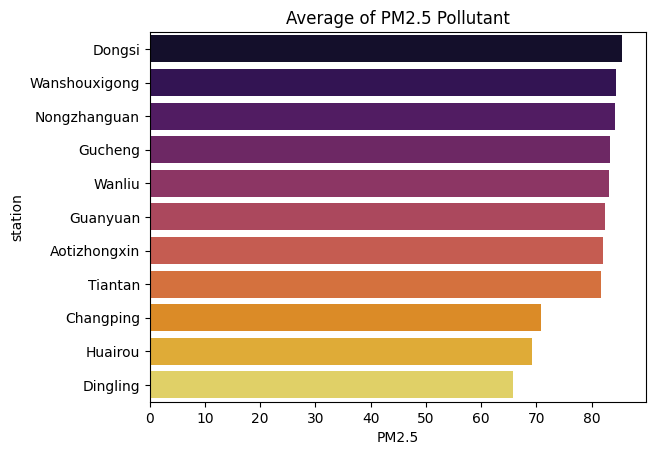

In [ ]:
#Average of PM2.5 
dfsns.barplot(y="station", x="PM2.5", data=grouped_df, palette="inferno", orient="h", order=grouped_df.sort_values(by=['PM2.5'], ascending=False).set_index("station").index).set(title="Average of PM2.5 Pollutant")

[Text(0.5, 1.0, 'Average of PM10 Pollutant')]

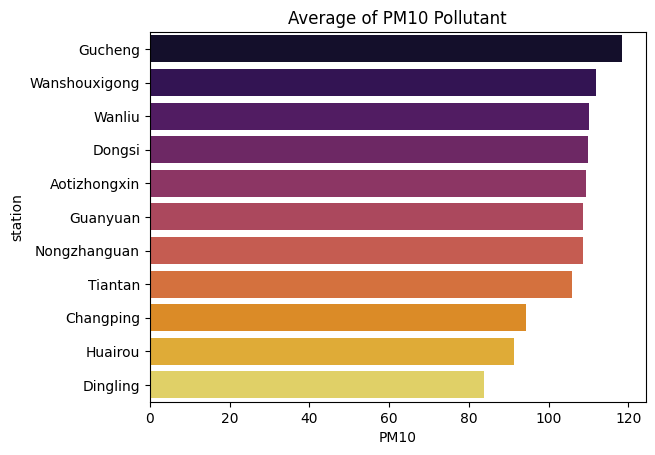

In [ ]:
#Average of PM10
sns.barplot(y="station", x="PM10", data=grouped_df, palette="inferno", orient="h", order=grouped_df.sort_values(by=['PM10'], ascending=False).set_index("station").index).set(title="Average of PM10 Pollutant")

[Text(0.5, 1.0, 'Average of SO2 Pollutant')]

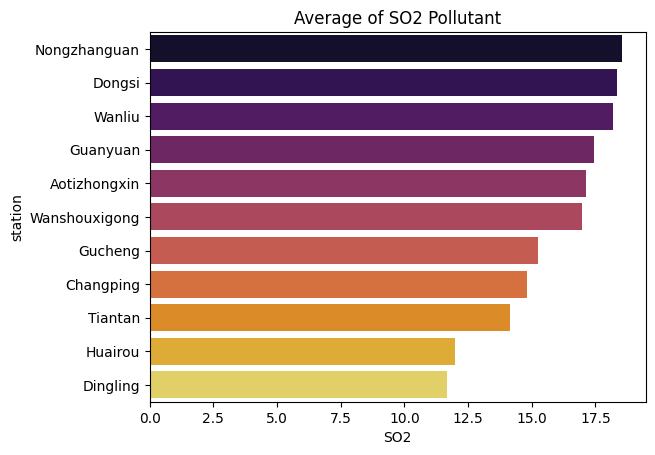

In [ ]:
#Average of SO2
sns.barplot(y="station", x="SO2", data=grouped_df, palette="inferno", orient="h", order=grouped_df.sort_values(by=['SO2'], ascending=False).set_index("station").index).set(title="Average of SO2 Pollutant")

[Text(0.5, 1.0, 'Average of NO2 Pollutant')]

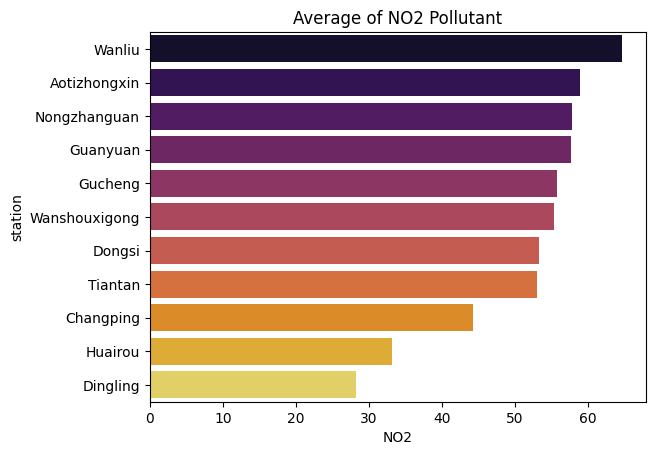

In [ ]:
#Average of NO2 Pollutant
sns.barplot(y="station", x="NO2", data=grouped_df, palette="inferno", orient="h", order=grouped_df.sort_values(by=['NO2'], ascending=False).set_index("station").index).set(title="Average of NO2 Pollutant")

[Text(0.5, 1.0, 'Average of CO Pollutant')]

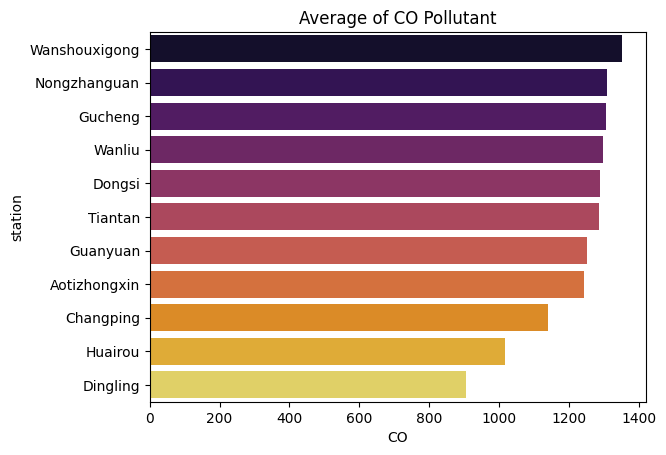

In [ ]:
#Average of CO Pollutant
sns.barplot(y="station", x="CO", data=grouped_df, palette="inferno", orient="h", order=grouped_df.sort_values(by=['CO'], ascending=False).set_index("station").index).set(title="Average of CO Pollutant")

[Text(0.5, 1.0, 'Average of O3 Pollutant')]

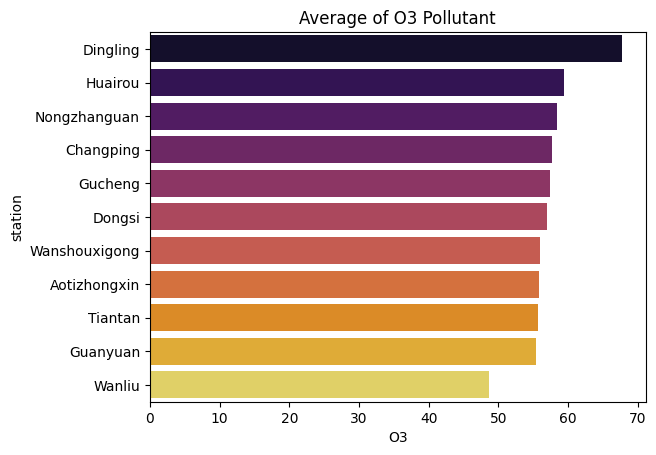

In [ ]:
#Average of O3 Pollutant
sns.barplot(y="station", x="O3", data=grouped_df, palette="inferno", orient="h", order=grouped_df.sort_values(by=['O3'], ascending=False).set_index("station").index).set(title="Average of O3 Pollutant")

[Text(0.5, 1.0, 'The Average of Air Temperature')]

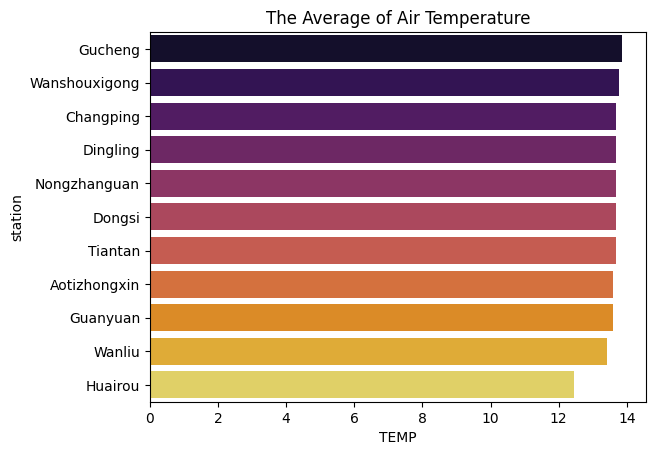

In [ ]:
#Average of Air Temperature
sns.barplot(y="station", x="TEMP", data=grouped_df, palette="inferno", orient="h", order=grouped_df.sort_values(by=['TEMP'], ascending=False).set_index("station").index).set(title="The Average of Air Temperature")

[Text(0.5, 1.0, 'The Average of Rainfall (m)')]

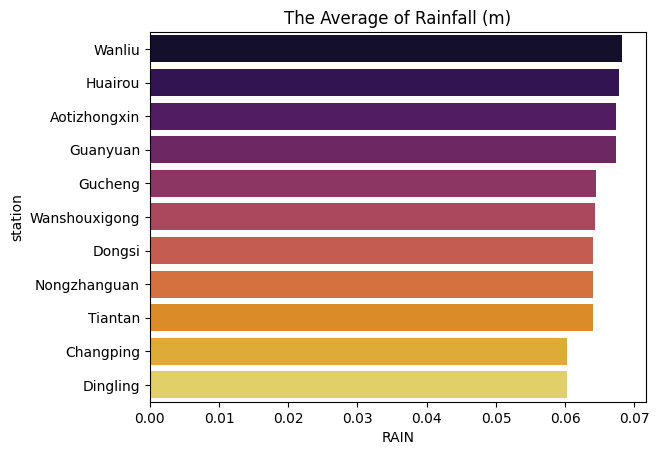

In [ ]:
#Average of Air Pressure
sns.barplot(y="station", x="RAIN", data=grouped_df, palette="inferno", orient="h", order=grouped_df.sort_values(by=['RAIN'], ascending=False).set_index("station").index).set(title="The Average of Rainfall (m)")

## Conclusion

- Conclution first question
The conclusion from the first question is that each station in Beijing tends to exhibit a similar pattern of increase and decrease in substances from 2013 to 2017. However, there are differences in the levels of each substance in each station.

- Conclution second question
The conclusion from the second question is that for PM2.5 and PM10 pollutants, the Gucheng station has the highest levels, while the Dingling station has the lowest levels. As for SO2, NO2, CO, and O3 pollutants, the Wansouxigong station has the highest levels, while the Dingling station has the lowest levels. From these observations, it can be inferred that the Dingling station has the best air quality. Additionally, the rainfall, pressure, and temperature at each station tend to be similar, but the temperature at the Huariou station tends to be lower compared to the other stations.